# Section 1 - Importing libraries/loading dataset

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("student_performance.csv")


# Section 2 - Data Visualizations

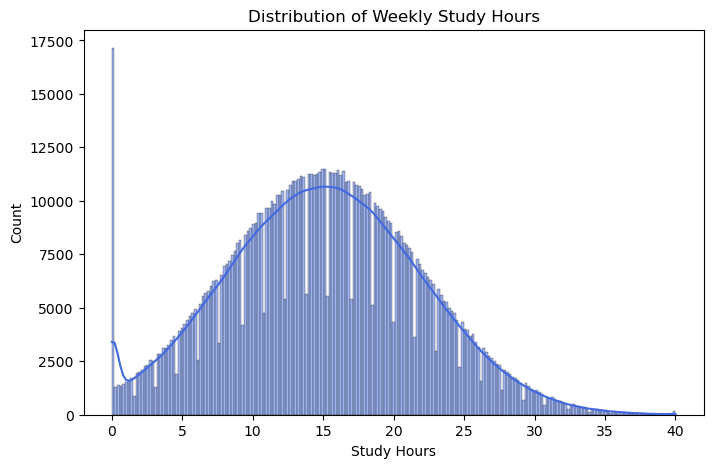

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['weekly_self_study_hours'], kde=True, color="royalblue")
plt.title("Distribution of Weekly Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

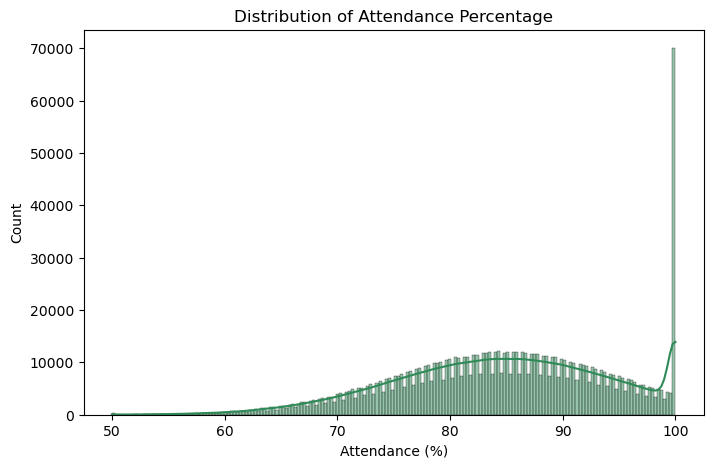

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['attendance_percentage'], kde=True, color="seagreen")
plt.title("Distribution of Attendance Percentage")
plt.xlabel("Attendance (%)")
plt.ylabel("Count")
plt.show()

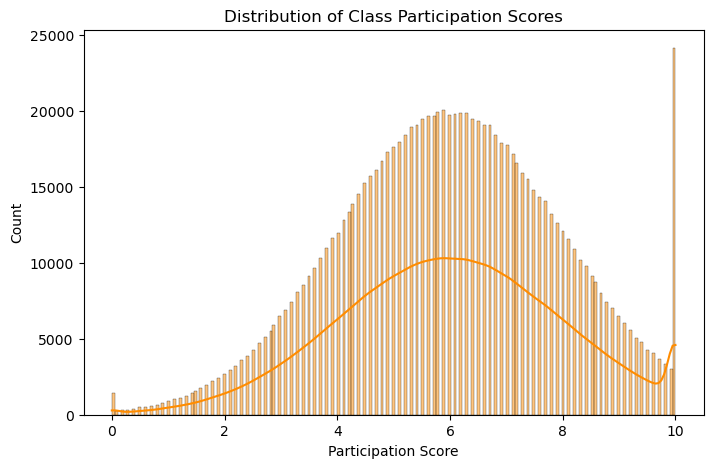

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['class_participation'], kde=True, color="darkorange")
plt.title("Distribution of Class Participation Scores")
plt.xlabel("Participation Score")
plt.ylabel("Count")
plt.show()

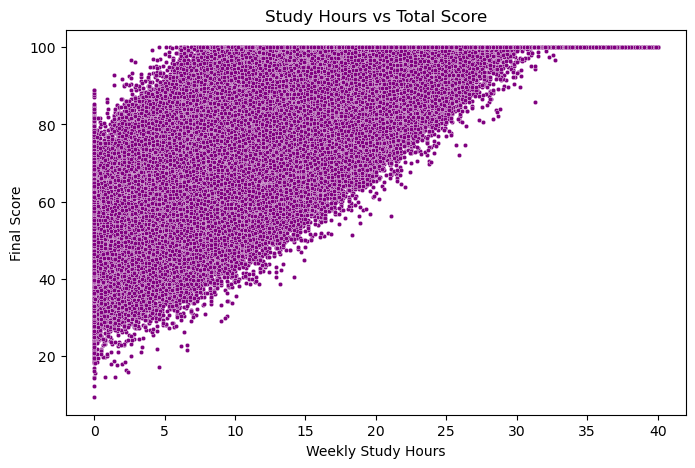

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['weekly_self_study_hours'], y=df['total_score'], s=10, color="purple")
plt.title("Study Hours vs Total Score")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Final Score")
plt.show()

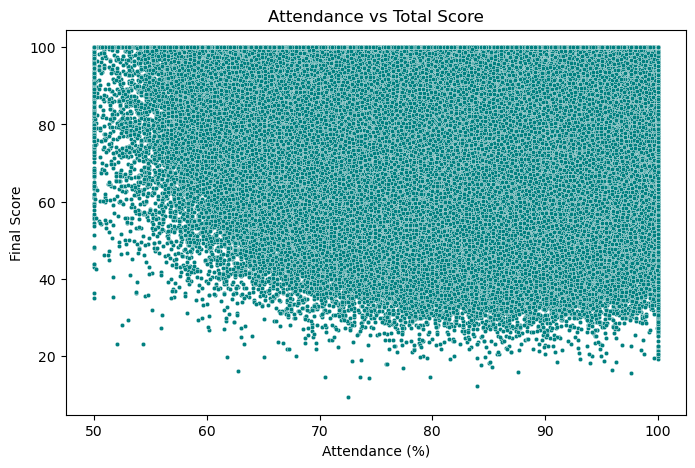

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['attendance_percentage'], y=df['total_score'], s=10, color="teal")
plt.title("Attendance vs Total Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Score")
plt.show()

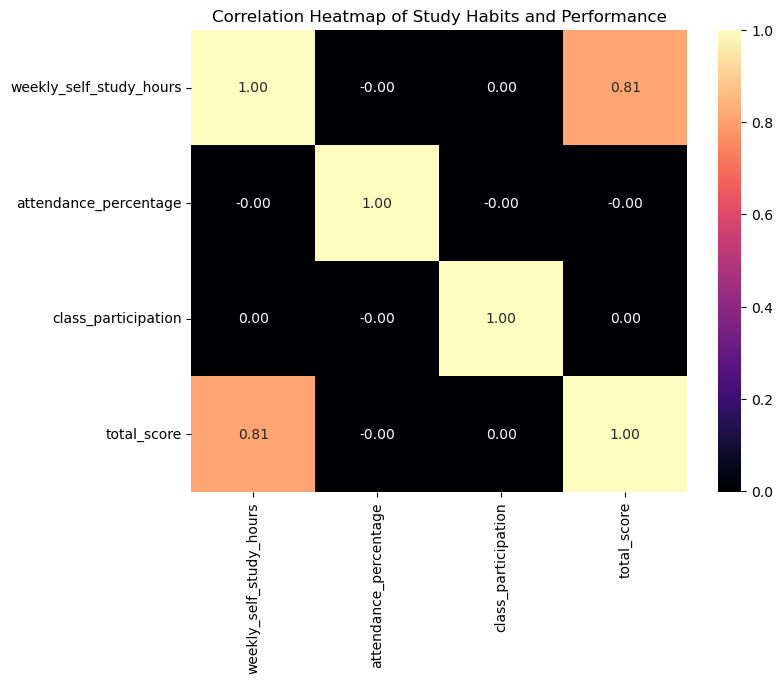

In [16]:
plt.figure(figsize=(8,6))
corr = df[['weekly_self_study_hours','attendance_percentage','class_participation','total_score']].corr()
sns.heatmap(corr, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap of Study Habits and Performance")
plt.show()


# Section 3 - Data Preprocessing

In [18]:
# features and targets
X = df[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y = df['total_score']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Section 4 - Linear Regression (Model 1)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_r2 = r2_score(y_test, lr_pred)

lr_rmse, lr_r2

C:\Users\Owner\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(8.996400873369833), 0.6600425865640975)

# Section 5 - KNN Regression (Model 2)

In [24]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_r2 = r2_score(y_test, knn_pred)

knn_rmse, knn_r2

C:\Users\Owner\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(8.986293081577074), 0.6608060670807651)

# Section 6 - Model Comparison

In [25]:
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2:", lr_r2)

print("KNN Regression RMSE:", knn_rmse)
print("KNN Regression R2:", knn_r2)


Linear Regression RMSE: 8.996400873369833
Linear Regression R2: 0.6600425865640975
KNN Regression RMSE: 8.986293081577074
KNN Regression R2: 0.6608060670807651


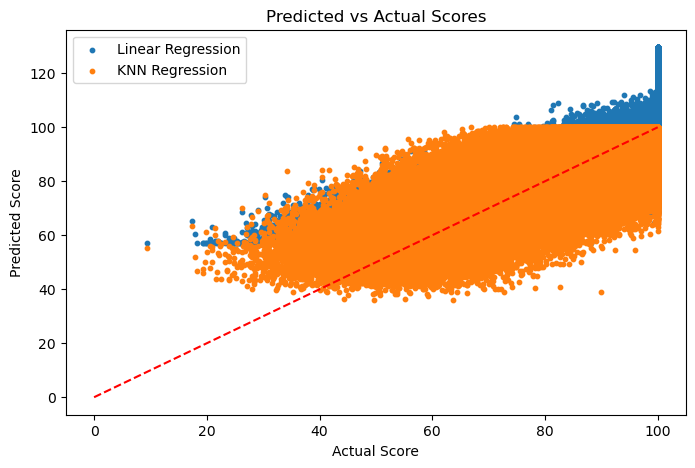

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, lr_pred, s=10, label="Linear Regression")
plt.scatter(y_test, knn_pred, s=10, label="KNN Regression")
plt.plot([0,100], [0,100], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.title("Predicted vs Actual Scores")
plt.show()